# Importing the needed libraries

In [29]:
# First we import the library we will need
import numpy as np
import pandas as pd
#from google.colab import drive
import tensorflow as tf
#import torch
#import torch.nn as nn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import keras_tuner as kt

%matplotlib inline

# Importing the data

In [2]:
# Define the file path and import the datas in a pandas dataframe named df
path = 'C:/Users/JF5191/Documents/DSTI/ML Python Labs/ML_PythonLabs/DOCKER_PYTHON/python_code/Churn_Modelling.csv'

In [155]:
df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Analysing the dataset

In [4]:
df.shape

(10000, 14)

In [5]:
df[df['Exited']==1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


we have 10 000 samples with 13 features (Rownumber is not considered as a usable feature)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There is 3 categorical features (to be transformed later) and the remaining data are numerical features.
Let's now check if there is some missing values.

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Let's check the number of unique value.

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Let's do EDA in order to better understand the dataset

In [9]:
print(f"Ratio of people who churned: {round(len(df[df['Exited']== 1])/len(df),2)}")
print(f"Ratio of male in the dataset: {round(len(df[df['Gender']=='Male'])/len(df),2)}")
print(f"Ratio of male in the churned people: {round(len(df[(df['Gender']=='Male') & (df['Exited']==1)]) / len(df[df['Exited']==1]),2)}")

Ratio of people who churned: 0.2
Ratio of male in the dataset: 0.55
Ratio of male in the churned people: 0.44


It seems that women are more likely to churn that men (smaller ration in the global dataset but higher ratio in the churned people).
Let's now study the 'Geogrpahy' feature.

In [10]:
round(df['Geography'].value_counts()/len(df),2)

France     0.50
Germany    0.25
Spain      0.25
Name: Geography, dtype: float64

There is more data for France than for Germany and Spain... This will lead to use the stratify option in the train / test split function in order to keep the same ratio in the training phase.

Let's compare the distribution of the numerical features CreditScore, Age, Tenure, Balance and Estimated Salary

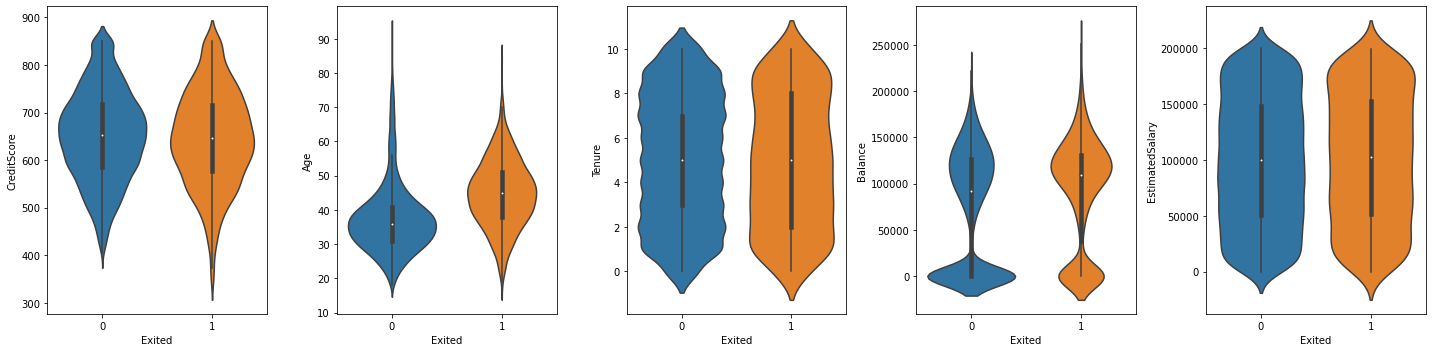

In [11]:
boxplot_col_names = ['CreditScore', 'Age','Tenure','Balance','EstimatedSalary']
ncols = len(boxplot_col_names)
fig, axes = plt.subplots(1,ncols)
fig.set_size_inches(20,5)

for name, ax in zip(boxplot_col_names, axes.flatten()):
    sns.violinplot(y = name, x = "Exited" , data = df, orient = 'v', ax = ax)
plt.tight_layout()

The distributions above show that age and balance an have an impact on the churn:
- churners are older than non-churners (around 10 years older: median 45 vs 35),
- small balance are more likeky not to churn than high balance.

Let's now check the categorical or binary features: NumOfProducts, HasCrCard and IsActiveMember

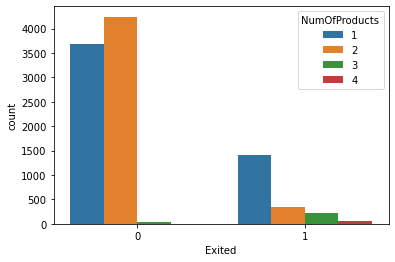

In [12]:
sns.countplot(x = 'Exited', hue = 'NumOfProducts', data = df);

In [13]:
print(f"# of product ratio for people who have NOT churned: \n{round(df[df['Exited']==0]['NumOfProducts'].value_counts() / len(df[df['Exited']==0]),2)}")

# of product ratio for people who have NOT churned: 
2    0.53
1    0.46
3    0.01
Name: NumOfProducts, dtype: float64


In [14]:
print(f"# of product ratio for people who have churned: \n{round(df[df['Exited']==1]['NumOfProducts'].value_counts() / len(df[df['Exited']==1]),2)}")

# of product ratio for people who have churned: 
1    0.69
2    0.17
3    0.11
4    0.03
Name: NumOfProducts, dtype: float64


People with 1, 3 and 4 products are more likely to churn than people with 2 products due to the ratio change.

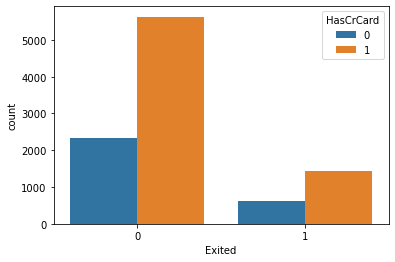

In [15]:
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = df);

In [16]:
print(f"Ratio of people having NOT churned and a credit card\n{round(df[df['Exited']==0]['HasCrCard'].value_counts() / len(df[df['Exited']==0]),2)}")

Ratio of people having NOT churned and a credit card
1    0.71
0    0.29
Name: HasCrCard, dtype: float64


In [17]:
print(f"Ratio of people having churned and a credit card\n{round(df[df['Exited']==1]['HasCrCard'].value_counts() / len(df[df['Exited']==1]),2)}")

Ratio of people having churned and a credit card
1    0.7
0    0.3
Name: HasCrCard, dtype: float64


Credit card seems to have a very low impact the ratio being the same for churned and not churned people.

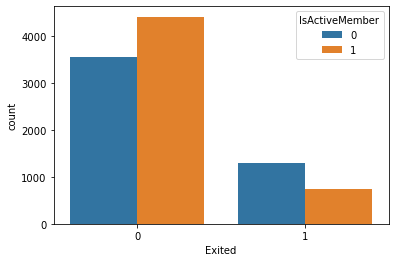

In [18]:
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = df);

In [19]:
print(f"Ratio of people having NOT churned and are active\n{round(df[df['Exited']==0]['IsActiveMember'].value_counts() / len(df[df['Exited']==0]),2)}")

Ratio of people having NOT churned and are active
1    0.55
0    0.45
Name: IsActiveMember, dtype: float64


In [20]:
print(f"Ratio of people having churned and are active\n{round(df[df['Exited']==1]['IsActiveMember'].value_counts() / len(df[df['Exited']==1]),2)}")

Ratio of people having churned and are active
0    0.64
1    0.36
Name: IsActiveMember, dtype: float64


People non active seems to be more likely to churn (increasing ratio)

# Modelling


We map the gender columns as a binary value because we can't use an object/categorical data as an input for the model.
We also one-hot encode the Geography feature so that we can use these categorical features in a model.

We then remove the unneeded columns ('RowNumber','CustomerId','Surname': because they are not usabel for the model, 'Exited' because it is the label (Y)  and 'Geography' because we just one-hot encoded it) and create the X dataset and the label dataset (Y) (we are working on a supervised model).

In [21]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male':1}) # mapping gender
df = pd.concat([df,pd.get_dummies(df['Geography'], prefix = 'country',
              drop_first= True)], axis = 1) # One-hot encoding Geography feature

df_X = df.drop(['Geography','Exited','RowNumber','CustomerId','Surname'],
            axis = 1)
X = df_X.values # creating X dataset
Y = df['Exited'].values # creating Y label

Now we split the datas in train / test  dataset using stratification due to unbalanced dataset over Geography and Gender for ex.

In [22]:
#split the data into training and test set (20% for the test set)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                        random_state = 10, stratify=Y)
# we use random_state to make sure spliting contains the same data each time
# (the train/test dataset will have the same rows each time)

In [23]:
Y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [24]:
# standardize the data (x_standardised = (x - x_mean)/std_dev)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # we use the scale set calculated from the
# training set just above and we apply it to transform the test set

We will create a function that will build and compare the performance of our different models with 5-fold crossvalidation and gridsearch

In [111]:
from sklearn.model_selection import GridSearchCV

def test_sklearn_model(model, param_grid, X_train, Y_train):
    """
    This function is performing a training using 5-fold cross validation and grid
    search over the param_grid given as input.
    It returns the best model and the results of all the training runs in a dataframe
    Takes as input a sklearn model and the parameters to test as a dictionary
    
    """
    tested_model = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "roc_auc")
    # Sensitivity is more important than accuracy because finding churn customer more important
    # roc_auc metrics is used for binary classification to optimize the sensitivity of the model

    tested_model.fit(X_train, Y_train)
    return tested_model, pd.DataFrame(tested_model.cv_results_)

In [116]:
# 1 - Logistic Regression Model

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty='l2') # create the model
param_grid = {'C':[0.001,0.01,0.1,1],'fit_intercept':[True, False], 'solver':['newton-cg','lbfgs','liblinear','sag']}
tested_logReg, Results_LogReg = test_sklearn_model(logisticRegr, param_grid, X_train, Y_train)
Results_LogReg

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023011,0.003564,0.001958,0.000569,0.001,True,newton-cg,"{'C': 0.001, 'fit_intercept': True, 'solver': ...",0.756872,0.777364,0.768311,0.753525,0.766303,0.764475,0.008508,24
1,0.006176,0.000486,0.001914,0.000487,0.001,True,lbfgs,"{'C': 0.001, 'fit_intercept': True, 'solver': ...",0.756877,0.777364,0.768311,0.753525,0.766303,0.764476,0.008507,22
2,0.006454,0.000749,0.001216,0.000394,0.001,True,liblinear,"{'C': 0.001, 'fit_intercept': True, 'solver': ...",0.757977,0.778176,0.769180,0.754137,0.766732,0.765240,0.008498,17
3,0.017671,0.002845,0.001760,0.000386,0.001,True,sag,"{'C': 0.001, 'fit_intercept': True, 'solver': ...",0.756872,0.777364,0.768325,0.753525,0.766291,0.764475,0.008508,23
4,0.011185,0.001330,0.001229,0.000456,0.001,False,newton-cg,"{'C': 0.001, 'fit_intercept': False, 'solver':...",0.758991,0.778611,0.769845,0.754681,0.766546,0.765735,0.008379,14
5,0.004962,0.000637,0.001223,0.000390,0.001,False,lbfgs,"{'C': 0.001, 'fit_intercept': False, 'solver':...",0.758988,0.778614,0.769845,0.754681,0.766546,0.765735,0.008380,14
6,0.004728,0.000405,0.001393,0.000473,0.001,False,liblinear,"{'C': 0.001, 'fit_intercept': False, 'solver':...",0.758991,0.778611,0.769845,0.754681,0.766546,0.765735,0.008379,14
7,0.015813,0.002152,0.001230,0.000384,0.001,False,sag,"{'C': 0.001, 'fit_intercept': False, 'solver':...",0.758993,0.778611,0.769857,0.754678,0.766546,0.765737,0.008380,13
8,0.013108,0.001297,0.001585,0.000517,0.01,True,newton-cg,"{'C': 0.01, 'fit_intercept': True, 'solver': '...",0.755504,0.780157,0.767117,0.752311,0.767374,0.764493,0.009897,20
9,0.005144,0.000850,0.001200,0.000400,0.01,True,lbfgs,"{'C': 0.01, 'fit_intercept': True, 'solver': '...",0.755504,0.780152,0.767124,0.752309,0.767379,0.764494,0.009897,19


In [120]:
# 2 - KNeighbors Classifier Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto') # create the model
param_grid = {'weights':['uniform','distance']}
tested_knn, Results_knn = test_sklearn_model(knn, param_grid, X_train, Y_train)
Results_knn



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022214,0.003882,0.120222,0.013995,uniform,{'weights': 'uniform'},0.781719,0.793287,0.763688,0.743237,0.753303,0.767047,0.018280,2
1,0.017188,0.001144,0.095250,0.003438,distance,{'weights': 'distance'},0.786877,0.797188,0.768537,0.745488,0.759814,0.771581,0.018538,1


In [127]:
# 3 - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_grid = {'splitter':['best','random'],
'max_depth': [5, 10, 20], 'max_features': [0.1, 0.3, 0.7],'ccp_alpha': [0, 0.005, 0.01, 0.1]}
tested_dtc, Results_dtc = test_sklearn_model(dtc, param_grid, X_train, Y_train)
Results_dtc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004804,0.001262,0.002559,0.000789,0,5,0.1,best,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.656391,0.640213,0.676633,0.531141,0.744690,0.649814,0.069195,30
1,0.003220,0.000746,0.003436,0.001971,0,5,0.1,random,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.548885,0.679034,0.667726,0.612725,0.652048,0.632083,0.047265,34
2,0.005206,0.001475,0.002349,0.000773,0,5,0.3,best,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.769153,0.843390,0.803797,0.738415,0.761230,0.783197,0.036695,4
3,0.003385,0.001083,0.002374,0.000387,0,5,0.3,random,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.659289,0.747772,0.733502,0.666505,0.735970,0.708607,0.037702,20
4,0.009762,0.001951,0.002148,0.000807,0,5,0.7,best,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.831050,0.836768,0.837463,0.799071,0.811865,0.823244,0.015230,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.007657,0.000817,0.001943,0.000112,0.1,20,0.1,random,"{'ccp_alpha': 0.1, 'max_depth': 20, 'max_featu...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,52
68,0.011202,0.000740,0.001409,0.000499,0.1,20,0.3,best,"{'ccp_alpha': 0.1, 'max_depth': 20, 'max_featu...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,52
69,0.007793,0.000396,0.001408,0.000482,0.1,20,0.3,random,"{'ccp_alpha': 0.1, 'max_depth': 20, 'max_featu...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,52
70,0.019034,0.001117,0.001373,0.000530,0.1,20,0.7,best,"{'ccp_alpha': 0.1, 'max_depth': 20, 'max_featu...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,52


In [129]:
# 4 - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_grid = {'bootstrap': [True, False],'n_estimators':[100, 200, 300], 'max_features':[0.1 , 0.3, 0.6]}
tested_rfc, Results_rfc = test_sklearn_model(rfc, param_grid, X_train, Y_train)
Results_rfc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.484457,0.007006,0.038118,0.001751,True,0.1,100,"{'bootstrap': True, 'max_features': 0.1, 'n_es...",0.857251,0.848829,0.847577,0.815791,0.834052,0.840700,0.014505,12
1,0.941516,0.009237,0.075065,0.002743,True,0.1,200,"{'bootstrap': True, 'max_features': 0.1, 'n_es...",0.856024,0.855739,0.849400,0.811145,0.840656,0.842593,0.016687,11
2,1.458799,0.055704,0.115567,0.011320,True,0.1,300,"{'bootstrap': True, 'max_features': 0.1, 'n_es...",0.860863,0.859253,0.849028,0.817208,0.842179,0.845706,0.015804,8
3,0.689946,0.007911,0.035610,0.001336,True,0.3,100,"{'bootstrap': True, 'max_features': 0.3, 'n_es...",0.861125,0.858772,0.853011,0.817077,0.850887,0.848174,0.015987,4
4,1.481241,0.080078,0.082241,0.012321,True,0.3,200,"{'bootstrap': True, 'max_features': 0.3, 'n_es...",0.862829,0.870903,0.857062,0.827383,0.849267,0.853489,0.014850,1
5,2.257105,0.121022,0.113302,0.015783,True,0.3,300,"{'bootstrap': True, 'max_features': 0.3, 'n_es...",0.863775,0.867395,0.855999,0.823031,0.854299,0.852900,0.015698,2
6,1.101008,0.023755,0.035632,0.000523,True,0.6,100,"{'bootstrap': True, 'max_features': 0.6, 'n_es...",0.852721,0.860579,0.848557,0.820735,0.848558,0.846230,0.013482,6
7,2.309311,0.139924,0.075801,0.011232,True,0.6,200,"{'bootstrap': True, 'max_features': 0.6, 'n_es...",0.856847,0.862686,0.850078,0.820490,0.847470,0.847514,0.014520,5
8,3.451260,0.186004,0.103954,0.000845,True,0.6,300,"{'bootstrap': True, 'max_features': 0.6, 'n_es...",0.859251,0.867059,0.852403,0.822487,0.852313,0.850703,0.015114,3
9,0.616449,0.011456,0.040759,0.001451,False,0.1,100,"{'bootstrap': False, 'max_features': 0.1, 'n_e...",0.854975,0.846724,0.840032,0.804560,0.834539,0.836166,0.017215,15


In [128]:
# 5 - Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
param_grid = {'n_estimators': [100,200,300],'learning_rate':[0.01, 0.05, 0.1], 'max_depth':[5 , 10, 20]}
tested_gbc, Results_gbc = test_sklearn_model(gbc, param_grid, X_train, Y_train)
Results_gbc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.218581,0.022748,0.005811,0.000750,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.862324,0.868865,0.856660,0.824866,0.852282,0.852999,0.015127,7
1,2.465537,0.029735,0.011640,0.000972,0.01,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.864897,0.869997,0.864417,0.834091,0.856608,0.858002,0.012698,4
2,3.971497,0.248451,0.015462,0.001238,0.01,5,300,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.868523,0.872540,0.869355,0.836848,0.859174,0.861288,0.013006,1
3,3.390510,0.089947,0.014212,0.001160,0.01,10,100,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.823733,0.855943,0.834423,0.805189,0.828401,0.829538,0.016425,18
4,7.020514,0.231427,0.026173,0.001578,0.01,10,200,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.833392,0.856218,0.835081,0.808182,0.836636,0.833902,0.015288,17
5,10.839671,0.314633,0.039443,0.001572,0.01,10,300,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.836593,0.859452,0.837270,0.813979,0.835442,0.836547,0.014392,15
6,6.015095,0.254125,0.020318,0.002833,0.01,20,100,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.695539,0.741330,0.723876,0.676102,0.714092,0.710188,0.022578,25
7,12.833643,0.293308,0.040199,0.004058,0.01,20,200,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.718408,0.758502,0.736359,0.689093,0.723513,0.725175,0.022743,22
8,22.648180,2.103150,0.063988,0.005427,0.01,20,300,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.701209,0.738880,0.724670,0.681101,0.710926,0.711357,0.019765,24
9,1.405264,0.023540,0.007200,0.000406,0.05,5,100,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.867259,0.873042,0.867824,0.837174,0.859983,0.861056,0.012645,2


Evaluation of the 5 models

In [138]:
# compile best model result

def keep_bestModel(data, model_name):
    """
    function generating the best result from each model training
    inputs:
    - Data: Dataframe outputed from GridSearchCV
    - model_name: name of the related model as str
    """
    best_model = data[data['rank_test_score']==1].copy()
    best_model['score'] = 'AUC'
    column = [
        'split0_test_score',
        'split1_test_score',
        'split2_test_score',
        'split3_test_score',
        'split4_test_score',
        'score'
    ]
    best_model = best_model[column].copy()
    best_model.set_index('score', inplace=True)
    best_model = best_model.T
    best_model['model'] = model_name
    best_model = dict(best_model)
    return pd.DataFrame.from_dict(best_model)

model_list = [Results_LogReg, Results_knn, Results_dtc, Results_rfc, Results_gbc]
model_name = ['LogisticRegression','KNearestNeighbor','DecisionTree','RandomForest', 'GradientBoosting']
all_best_model = pd.DataFrame()

for df, model in zip(model_list, model_name):
    mod = keep_bestModel(df, model)

    all_best_model = pd.concat([all_best_model, mod], axis = 0)

all_best_model.reset_index(inplace = True)

Plotting the results

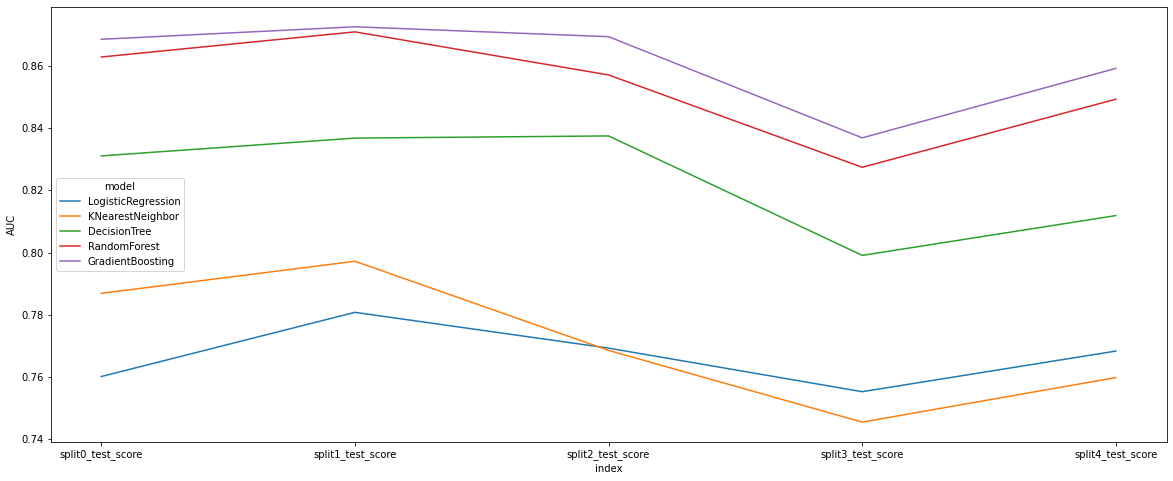

In [147]:
plt.figure(figsize = (20,8))
ax = sns.lineplot( y = all_best_model['AUC'], x = all_best_model['index'], hue = all_best_model['model'], ci = 'sd')

This shows that the gradient boosting model is the better model from tested sklearn model.

In [167]:
# Shows the bast parameters for Gradient Boosting
tested_gbc.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

Let's try now an artificial neural network (Keras) that we will tune with keras_tuner

In [230]:
# 6 - Custom Artificial Neural Network classifier

def build_ann(hp):
    # Initialize the empty model
    model = tf.keras.models.Sequential()
        
    # Create from 1 to 3 layers with 2 to 10 neurones, several choice for activation function and a large range for l2 regularization coef
    for i in range (hp.Int('num_layers', 1 ,3)):
        model.add(tf.keras.layers.Dense(
            units = hp.Int('unit_'+str(i),
            min_value = 2,
            max_value = 10,
            step = 1),
            activation = hp.Choice("activation", ['relu', 'tanh', 'softmax']),
            kernel_regularizer = tf.keras.regularizers.l2(hp.Float('l2', min_value = 0.0001, max_value = 0.01, sampling = 'log'))
            ))

    # Possibility to add a dropout
    if hp.Boolean('dropout'):
        model.add(tf.keras.layers.Dropout(hp.Choice('rate', [0.1, 0.2, 0.3, 0.4, 0.5])))
    
    # Add the output layer: one node with sigmoid activation functoin as we want a binary output
    model.add(tf.keras.layers.Dense(units = 1,kernel_initializer='uniform', activation='sigmoid')) # sigmoid for binary, Softmax for multiclass

    # Define a learning rateas a parameter to tunr
    learning_rate = hp.Float('lr', min_value = 1e-4, max_value = 1e-1, sampling = 'log') 
    
    # compile the model and return it
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
        )
    return model

In [231]:
build_ann(kt.HyperParameters())

tuner = kt.RandomSearch(
    hypermodel= build_ann,
    objective="val_accuracy",
    max_trials = 3,
    executions_per_trial = 2,
    overwrite = True,
    directory = 'C:/Users/JF5191/Documents/DSTI/ML Python Labs/ML_PythonLabs/DOCKER_PYTHON/python_code/',
    project_name = 'ML_Python_Labs'
)

In [232]:
#printing the summary of the search space
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
unit_0 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'softmax'], 'ordered': False}
l2 (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}


In [233]:
# Training and searching for the best hyperparameters
tuner.search(X_train,Y_train, epochs = 100, validation_data = (X_test, Y_test))

Trial 3 Complete [00h 02m 00s]
val_accuracy: 0.8440000116825104

Best val_accuracy So Far: 0.8524999916553497
Total elapsed time: 00h 05m 20s
INFO:tensorflow:Oracle triggered exit


In [237]:
# Get best model and printing the bests hyperparameters
best_ann_model = tuner.get_best_models()[0]
best_hp = tuner.get_best_hyperparameters()[0]
best_hp.values



{'num_layers': 2,
 'unit_0': 3,
 'activation': 'relu',
 'l2': 0.0036829058136406694,
 'dropout': False,
 'lr': 0.007974478523527971,
 'unit_1': 2}

So our best model is a three layer ANN (3 / 2 / 1) with relu function activation on layer 1 & 2 and the other above parameters with accuracy of 85%.
Let's get the results over the test set and print loss / accuracy function.

In [241]:
history = best_ann_model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8531
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8562
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8574
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8562
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8566
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8537
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8576
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8550
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8554
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3634 - accura

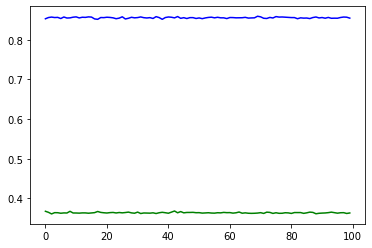

In [248]:
plt.plot(history.epoch, history.history['loss'],'g', label = 'Training loss')
plt.plot(history.epoch, history.history['accuracy'],'blue', label = 'Training accuracy');

The accuracy / loss splopes are very stable over the Epochs.

The accuracy of random forest / gradient boosting and ANN are very close. For the implementation of the model in our API, we will choose the random forest model due to its simplicity compare to the 2 others.



In [243]:
history